# Class 5: Plotting data

&nbsp;  
This week, we'll be exporing how to plot our data using seaborn, a powerful data visualisation library built on top of matplotlib which allows us to draw really attractive and sophisticated graphs.

In today's class, we'll explore the different plot types that are available. These include **relational** plots (e.g. scatter plots), **distributional** plots (e.g. histograms) and **categorical** plots (e.g. box plots), along with a few others. Then in Friday's class, we'll learn how to customise our plots by changing the colour palette, adding a title, formatting the axes etc.
 
<div>
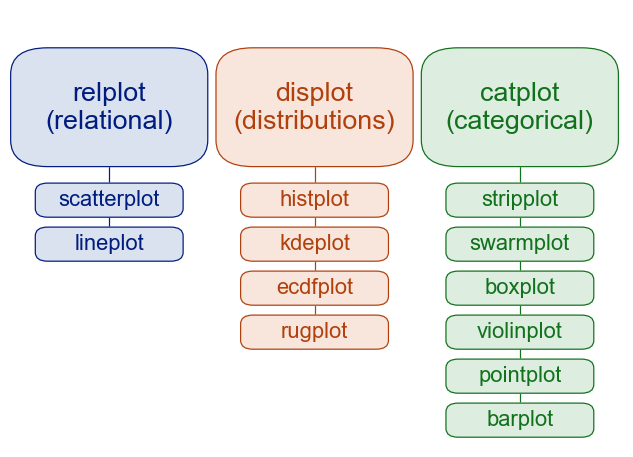
</div>
&nbsp;

## Load the modules

For this class, we'll need pandas, matplotlib and seaborn.

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring plot types

&nbsp;  
<div>
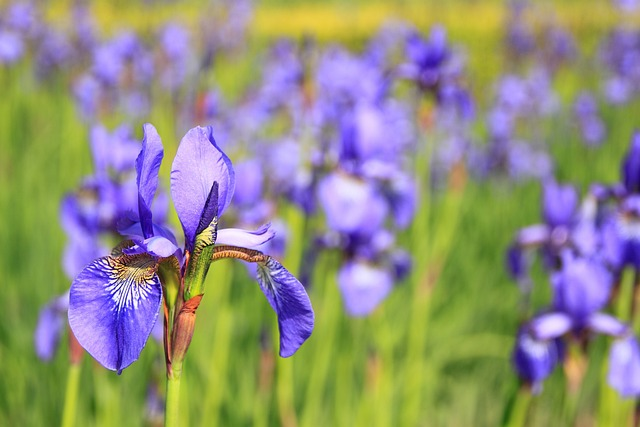
</div>
&nbsp;

We'll explore seaborn's plot types using a dataset of floral organ lengths for three species of iris from three habitats. Read in the Iris.txt file from the Datasets folder. Call it 'iris'. Then check the data using `iris.head()`.

## Relational plots

We use relational plots to illustrate the relationship between two numerical variables. In seaborn, the default relational plot is a scatter plot. Let's use a scatter plot to look at the relationship between sepal length and petal length.

In [ ]:
sns.relplot(x = 'sepal_length', y = 'petal_length', data = iris)

Seaborn makes it really easy to switch between plot types. Let's change this relational plot from a scatter plot to a line plot. To do this, copy the code above into the cell below, and add the argument `kind = 'line'`.

With a line plot, confidence intervals are added when there are overlapping points. The main line is the mean, and the shaded regions represent the 95% confidence interval.

It would be nice to explore this relationship a bit further, perhaps by examining differences between sites. With seaborn, we can use different colours for different subsets of the dataframe. Let's plot another scatter plot of petal length against sepal length, but colour it by 'Site'. To do this, we need to add the `hue` argument.

In [ ]:
sns.relplot(x = 'sepal_length', y = 'petal_length', data = iris, hue = 'Site')

Copy the code above but colour the plot by 'Species', rather than 'Site'.

Another useful type of relational plot is `lmplot`, which is used for adding the results of a linear regression to a scatter plot. Specifically, it adds the linear regression line for y~x along with the 95% confidence interval.

Use `sns.lmplot` to explore the relationship between petal length and petal width.

Now, plot it again but colour it by 'Species'.

## Distribution plots

Distribution plots plot the distribution of numerical variables. The default is a histogram. Let's use a histogram to examine the distribution of the 'sepal length' variable.

In [ ]:
sns.displot(x = 'sepal_length', data = iris)

Plot another histogram of 'sepal_length' and colour it by 'Species' using the `hue` argument.

What happens if we wanted to subset the data by 'Site' too? We can do this by adding in an extra argument - `col` - which prints plots side by side (col stands for column).

In [ ]:
sns.displot(x = 'sepal_length', data = iris, hue = 'Species', col = 'Site')

Try this again, with the 'Species' in columns and coloured by 'Site'.

## Categorical plots

We use categorical plots when we want to explore the relationship between categorical variables. The default is a strip plot. Let's plot the differences in petal length between species.

In [ ]:
sns.catplot(x = 'Species', y = 'petal_length', data = iris)

Again, we can change the type of categorical plot using the `kind =` argument. Other kinds of categorical plot are:

- `kind = 'swarm'`
- `kind = 'strip'`
- `kind = 'box'`
- `kind = 'violin'`
- `kind = 'point'`
- `kind = 'bar'`

Use the cell below to explore these different plot types. What do you think is the difference between a swarmplot and a stripplot?

Once again, we can colour by a third variable using the `hue` argument. Plot a swarmplot of 'sepal_length' by 'Species', and colour it by 'Site'.

A nice feature of violin plots is we can 'split' them to explore differences between two subsets of the data by adding the argument `split = True`. Here's an example of a split violin plot to explore the difference in sepal length among species, and the 'Field' and 'Marsh' sites. Note that split violin plots only work when we have 2 subsets of data (i.e. 'Field' and 'Marsh' in this case).

Don't worry about the code just now - we will be learning how to subset dataframes next week.

In [ ]:
sns.catplot(x = 'Species', y = 'sepal_length', data = iris[iris['Site'].isin(['Field', 'Marsh'])], 
            kind = 'violin', hue = 'Site', split = True)

Copy the code above, and edit it to explore the differences between the 'Marsh' and 'Roadside' sites.

## Composite plots

It is often useful, particularly early on in data exploration, to present both categorical and numerical plots together. We can do this using seaborn's `jointplot`.

In [ ]:
sns.jointplot(x = 'sepal_length', y = 'petal_length', data = iris)

Write code in the cell below to colour this joint plot by 'Species'.

Another useful plot is `pairplot`, which plots each of the numerical variables against each other in one big grid.

In [ ]:
sns.pairplot(data = iris) # note: due to the nature of the plot, we do not need to specify x or y

Now edit the code above to colour the pair plot by 'Species'.

## Figure-level vs axes-level plots

Many of seaborn's plot types can be divided into two main groups - **figure-level plots** (also known as facet grids) and **axes-level plots**. `relplot`, `displot` and `catplot` are all figure-level plots. You may have noticed the word 'FacetGrid' appearing in the line of text at the top of the plot - this tells you it is a figure-level plot.

We'll now explore some of seaborn's axes-level plots. These produce very similar plots to those we have seen so far, but there are some important differences, particularly in how you customise them (which we will see in the next class).

Let's start by plotting a scatter plot. Instead of using the figure-level `sns.relplot` method, we'll use the axes-level `sns.scatterplot` method.

In [ ]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris, hue = 'Species')

This looks slightly different to `relplot` - we have a boundary box surrounding the whole graph, and the legend is inside the plotting area.

In the cells below, try plotting...

- a histogram of 'sepal-width', coloured by 'Site', using `sns.histplot`.
- a box plot of 'sepal-length' against 'Species', coloured by 'Site', using `sns.boxplot`.
- a barplot of 'petal_width' against 'Site' using `sns.barplot`. Add an extra argument so that the error bars represent the standard error (see documentation on how to do this: https://seaborn.pydata.org/generated/seaborn.barplot.html).

We can't use the argument `col` with an axes-level plot. To plot two axes-level plots next to each other, we need to use some different code. This is not as 'tidy' as using `col` but it does have the advantage that you can plot different plot types next to each other. Here's what the code might look like.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.boxplot(x = 'Species', y = 'sepal_length', data = iris, ax = axes[0])
sns.lineplot(x = 'sepal_length', y = 'sepal_width', data = iris, ax = axes[1])

In the first line of the code above, the '1' represents the rows and the '2' represents the columns. We therefore have 2 plots in 1 row and 2 columns (i.e. next to each other).

Edit the code above to plot two graphs, one on top of the other. You may want to adjust the figure size.

- On the top, plot a histogram of 'petal_width', coloured by 'Site', using `sns.histplot`.
- On the bottom, plot a strip plot of 'sepal_length' against 'Species', coloured by 'Site', using `sns.stripplot`.

## A bit more practice

&nbsp;  
<div>
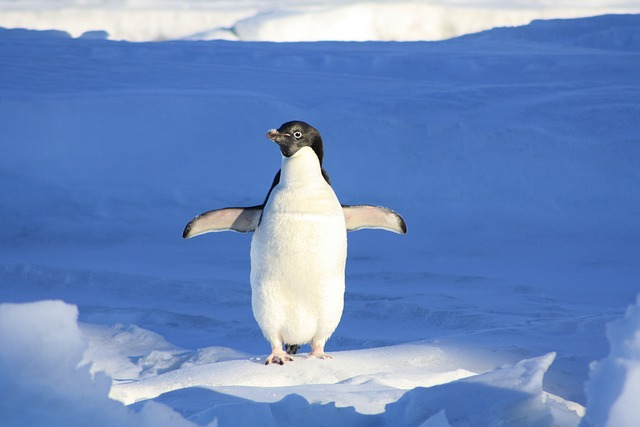
</div>
&nbsp;

Load the penguins.csv dataset from the Datasets folder. This dataset contains trait data on three different species of penguins (Adelie, Chinstrap and Gentoo) from three different islands in Antarctica.

Call it 'penguins' and check to see it has loaded correctly.

Then...

- plot a scatter plot of 'bill_depth_mm' against 'bill_length_mm', coloured by 'sex'.
- plot a box plot of 'flipper_length_mm' against 'Species'.
- plot a swarm plot of 'body_mass_g' against 'island', coloured by 'species'.
- plot three strip plots, side by side, of 'flipper_length_mm' against 'species' and coloured by 'sex', one for each island.
- plot three histograms, side by side, of 'flipper_length_mm' coloured by 'sex', one for each species.
- plot a pair plot of the whole dataset, coloured by 'island'.
- plot two plots next to each other. First, plot a bar plot of 'flipper_length_mm' against 'sex'. Then, plot a scatter plot of 'flipper_length_mm' against 'bill_length_mm' coloured by 'sex'.

## If you have time in class, or for homework...


Have a go practising the techniques you've learned today on some of your own datasets, or some of the other datasets from within the Datasets folder. Think carefully about which plot types are most appropriate for your data.